# An Analysis of the Effect of Oil & Gas Production and Consumption on Country GDP

## II. Exploratory Data Analysis
## Introduction

Economic growth needs energy. Manufacturing and fabrication processes needs different sources of fuel to power production operations. The more output to be produced, the more energy needed.

Hydrocarbon-based energy sources such as oil and gas have been the most prominent sources of energy in the last few decades. In fact, it has played such an important role that access to these products to have been one of key issues in the geo-political agendas among countries. Access to energy sources have direct implications on a countries ability to fuel economic growth.

Arguably, one of indicators that can be used for economic growth is GDP, more precisely [GDP per capita](http://seekingalpha.com/article/189448-normalized-gdp-the-real-story-of-growth), a normalised GDP value by country population in current US$ for each designated year.

## Problem Statement

Utilising the data available from [BP](http://www.bp.com), this Capstone Project is an attempt to analyse the possible correlation between oil and gas base metrics such as total reserves, production, consumption and price, and economic growth, represented by GDP per capita.

## Goal

The goal of this capstone project is to use descriptive and inferential statistics as a means to evaluate the oil and gas production and price data and subsequently to use statistical models to try to predict a country's GDP based on the available predicting variables.

## Approach

1. Collect, combine, format and melt related data from identified sources and store in a retrievable format for further analysis.
2. Conduct an exploratory data analysis to profile available features for the 51 years oil and gas historical data. Analyse suitability of data for further analysis and into developing a statistical model.
3. Use a linear regression model to get an early 'intuition' of the data as well as an insights into a further analysis necessary in order to optimise the modelling that improves the performance / accuracy.
4. Proceed with developing higher accuracy predictive model for the data and assess performance against un-seen data. This includes the utilisation of time-series analysis of a country's gdp growth-rate of choice.
5. Write a summary of the study in a short presentation format.

## Source of Data
[BP](http://www.bp.com) have, over the years, collected data related to production and consumption of a number of energy sources including oil and gas, coal, hydro, nuclear. This data is made publicly accessible via its website.

1. Oil and Gas
The Oil and Gas Production and Consumption data is taken from a publicly accessible location at the [BP website](http://www.bp.com). The data is in a time-series format, starting from year 1965 through to 2015. 
Note: 
a. at the time when this capstone project started, 2016 data is not yet available.
b. Due to one reason or another, some countries do not have a complete data for the time period mentioned above.

2. GDP Data
The GDP per capita data as well as gdp growth by country are retrieved from the Worldbank website (http://data.worldbank.org). Data was obtained for the same time period as the Oil and Gas Data above (51 years period) for all oil producer and consumer countries.

```
Data
    year: year between 1965 and 2015 (51 years)
    country: Country name
    gas_reserves: gas hydrocarbon reserves. Unit: Trillion Cubic Meters
    gas_production: unit: Billion cubic feet per day
    gas_consumption: unit: Billion cubic feet per day
    oil_reserves: unit: Billion Barrels
    oil_production: unit: Billion Barrels
    oil_consumption: unit: Thousand Barrels Daily
    gdp_per_capita (in US$)
    gdp growth rate (in %)
```


**Assumptions:**

1. Data is valid. Precautions have been put in place by sourcing the data from trustworthy sources such as BP website and Worldbank.

2. Due to limitation on the extent of data available, an assumption may be made to fill the missing time-series data, as necessary. 

3. Some countries have missing GDP data, either in the beginning or in the middle of the time series. For the purpose of analysis, these gaps have been eliminated by filling the values using fillna() method with the forward-fill method. This is the case for countries such as Iraq, Bolivia, etc. 
(Note: This has not yet been applied to the data used for the EDA analysis and modelling)

**Risks:**

1. The assumed data-points mentioned in the assumption section above, when applied, can bear a risk to the overall statistics of the data.

2. As the majority of the assumed data-points are taking place at the early part of the time period used, risks are therefore greater when analysis is done involving data coming from the early part of the time period.

---

### INITIALIZE ENVIRONMENT

In [5]:
import pandas as pd
import numpy as np
from __future__ import division
from datetime import datetime
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import matplotlib as mpl
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 8,
        }
sns.set_style("darkgrid")
sns.set_style("ticks", {"xtick.major.size": 12, "ytick.major.size": 12})
%matplotlib inline
matplotlib.style.use('ggplot')

In [6]:
base = pd.read_csv("base.csv")
base = base.drop("Unnamed: 0", axis=1).rename(columns={'index':'year'})
df_nations = base[base['category']=='nation']

# A. Oil Supply

The supply of world's oil are carried out by effectively two 'groups' of countries, OPEC (Organization of the Petroleum Exporting Countries) and countries that are outside of the OPEC organisation membership (generally known as Non-OPEC countries).

The following exploratory data analysis will look at the following:
- The role OPEC countries play in the production of world oil as a whole
- Comparison between the top OPEC and Non-OPEC countries based on production level, also by proved oil reserves
- Location of OPEC countries
- Analysis whether a country is a net-producer or a net-importer.

### Total Oil Producing Countries (OPEC vs. Non-OPEC)

**Total country in the data base:**

In [7]:
print "Total countries represented in the Oil & Gas database: ", len(base[base['category']=='nation']['country'].value_counts())

Total countries represented in the Oil & Gas database:  84


Of these 84 countries, the following is the breakdown between OPEC and Non-OPEC countries.

Note:
Some countries listed in the data are not producing oil but are consumers. Therefore, they are not part of the total listed as oil-producing countries.


In [8]:
# OPEC Countries
p = len(df_nations[df_nations['opec']== 1]['country'].unique())
print "Total OPEC countries: ", p

# Non-OPEC Oil Producing Countries
x1 = df_nations[df_nations['opec']== 0]
x1 = x1[x1['year']>=2005]
x1 = x1.groupby('country').agg(sum)
q = len(x1[x1['oil_production'].notnull()])
print "Total Non-OPEC countries: ", q

print "OPEC Countries Proportion: ", p/(p+q)
print "Non OPEC Country Proportion: ", q/(p+q)

Total OPEC countries:  14
Total Non-OPEC countries:  34
OPEC Countries Proportion:  0.291666666667
Non OPEC Country Proportion:  0.708333333333


### Top-5 OPEC and Non-OPEC Producers

In [9]:
df_opec = df_nations[df_nations['opec']== 1]
df_non_opec = df_nations[df_nations['opec']== 0]
df_opec_average = df_opec[df_opec['year']>=2005][['country', 'oil_production', 'oil_consumption']].groupby('country').agg('sum')/10
df_opec_average = df_opec_average.sort_values('oil_production', ascending=False).head(5)
df_non_opec_average = df_non_opec[df_non_opec['year']>=2005][['country', 'oil_production', 'oil_consumption']].groupby('country').agg('sum')/10
df_non_opec_average = df_non_opec_average.sort_values('oil_production', ascending=False).head(5)

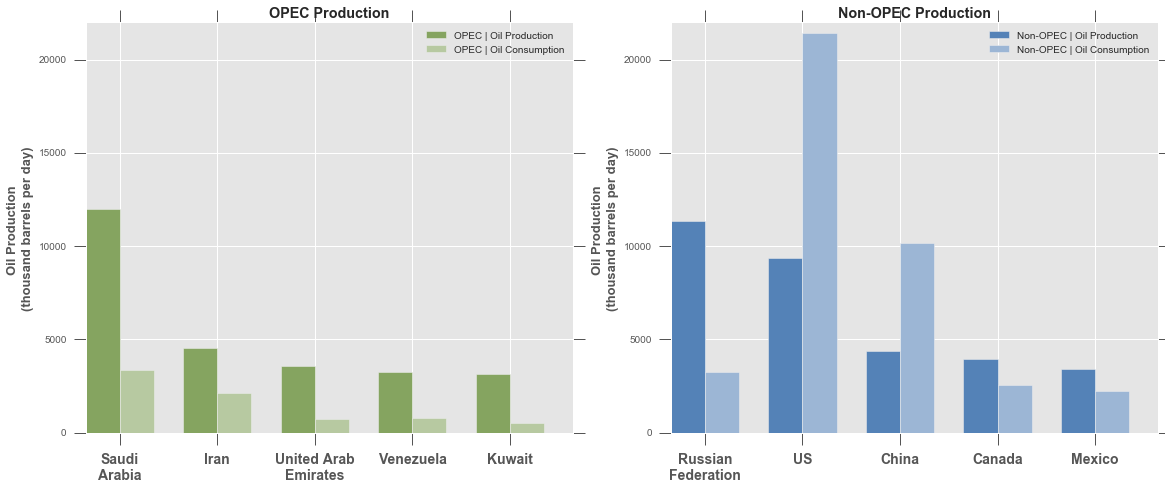

In [10]:
# Top-5 Producers (by total daily production in the last 10 years)
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(1,2,1)

ind = np.arange(5)
width = 0.35

x1 = ['Saudi\nArabia', 'Iran', 'United Arab\nEmirates', 'Venezuela', 'Kuwait']
x2 = ['Russian\nFederation', 'US', 'China', 'Canada', 'Mexico']

# OPEC
y1 = df_opec_average['oil_production']
y2 = df_opec_average['oil_consumption']
ax1.bar(ind, y1, width, color='#85a460', label="OPEC | Oil Production")
ax1.bar(ind+width, y2, width, color='#b7c9a1', label="OPEC | Oil Consumption")
plt.legend()

# Non-OPEC
y3 = df_non_opec_average['oil_production']
y4 = df_non_opec_average['oil_consumption']
ax2 = fig.add_subplot(1,2,2)
ax2.bar(ind, y3, width, color='#5482b7', label="Non-OPEC | Oil Production")
ax2.bar(ind+width, y4, width, color='#9cb6d5', label="Non-OPEC | Oil Consumption")

fig.subplots_adjust(bottom=0.025, left=0.01, top = 0.5, right=1.5, wspace=0.2)

ax1.set_xticks(ind+width)
ax1.set_xticklabels(x1, weight='bold', fontsize=14)
ax2.set_xticks(ind+width)
ax2.set_xticklabels(x2, weight='bold', fontsize=14)
ax1.set_ylabel("Oil Production \n(thousand barrels per day)", weight='bold', fontsize=13)
ax2.set_ylabel("Oil Production \n(thousand barrels per day)", weight='bold', fontsize=13)
ax1.set_title("OPEC Production", weight='bold')
ax2.set_title("Non-OPEC Production", weight='bold')

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
ax1.set_ylim(0,22000)
ax2.set_ylim(0,22000)
plt.legend()
plt.show()

The chart above shows that top-5 producing countries from both groups. Alongside, total daily consumption is also shown.

**Production**

The single highest OPEC producer is Saudi Arabia, produces more than double amount of oil per day compare to the next in line, Iran. (below the 5 million barrels of oil per day mark).

However, there are two Non-OPEC producers that are producing beyond the 5 million barrels per day mark, i.e. Russia and the US.

**Consumption**

All of the top-5 OPEC producers are producing a lot more than what they consume. This effectively categorises them as net-producing countries.

On the other hand, US and China consume more than what they produce on a daily basis. The two countries are therefore, net-consumers / net-importers (as they have to import oil from overseas to satisfy in-country consumption demand). Russia, Canada and Mexico remain net-producers.

### OPEC vs Non-OPEC - Percentage of Total World Production

In [11]:
df_total_world = base[base['country']=='Total World']
df_oil_price = pd.DataFrame(base[base['country']=='US'])
df_opec_total = df_opec.groupby('year').agg('sum')[['oil_production', 'gdp', 'gdp_gr']]

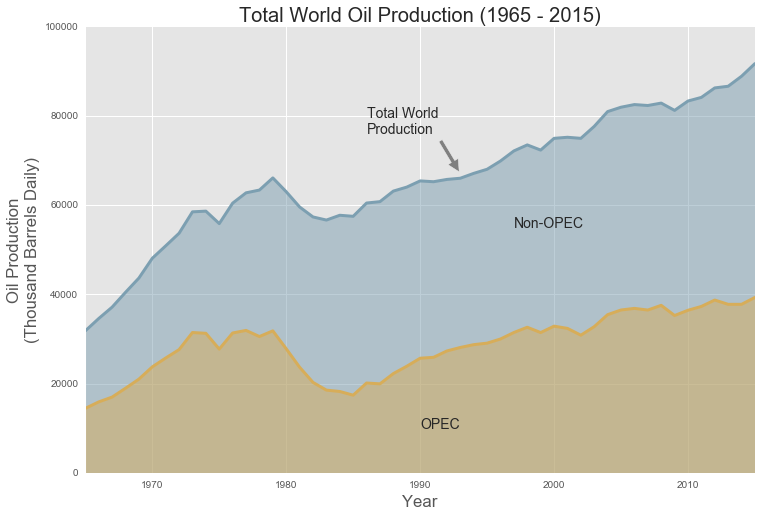

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
x = df_total_world['year'].sort_values()
y1 = df_total_world.groupby('year').agg('sum')['oil_production']
y2 = df_opec_total['oil_production']
plt.plot(x, y1, '-', c='#7c9fb1', linewidth=3)
plt.fill_between(x, y1, 0, facecolor='#7c9fb1', alpha=0.5) #cad357
plt.plot(x, y2, '-', c='#d7ad59', linewidth=3)
plt.fill_between(x, y2, 0, facecolor='#d7ad59', alpha=0.5)
plt.xlim(1965, 2015)
plt.style.use('fivethirtyeight')
plt.annotate('OPEC', xy=(1990, 10000), xytext=(1990, 10000))
plt.annotate('Non-OPEC', xy=(1997, 55000), xytext=(1997, 55000))
plt.annotate('Total World\nProduction', xy=(1993, 67000), xytext=(1986, 76000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
plt.title('Total World Oil Production (1965 - 2015)')
plt.xlabel("Year")
plt.ylabel("Oil Production\n(Thousand Barrels Daily)")
plt.show()

As shown above, the OPEC countries, since its inception in 1960, have been important contributors to world's total oil production. OPEC has 45% share of the pie while Non-OPEC takes 55%.

However, looking at this differently, the three major producing countries, Saudi, US and Russia, contribute to about 30% of total world's oil production. This emphasises the crucial role these countries play in the world's energy market.

## B. Oil Consumption

The demand of world's oil come from oil consuming countries, which virtually is every single country in the world.

### Top-5 Oil Consumers (OECD vs. Non-OECD )

In [13]:
df_oecd = df_nations[df_nations['oecd']== 1]
df_non_oecd = df_nations[df_nations['oecd']== 0]
df_oecd_average = df_oecd[df_oecd['year']>=2005][['country', 'oil_production', 'oil_consumption']].groupby('country').agg('sum')/10
df_oecd_average = df_oecd_average.sort_values('oil_consumption', ascending=False).head(5)
df_non_oecd_average = df_non_oecd[df_non_oecd['year']>=2005][['country', 'oil_production', 'oil_consumption']].groupby('country').agg('sum')/10
df_non_oecd_average = df_non_oecd_average.sort_values('oil_consumption', ascending=False).head(5)

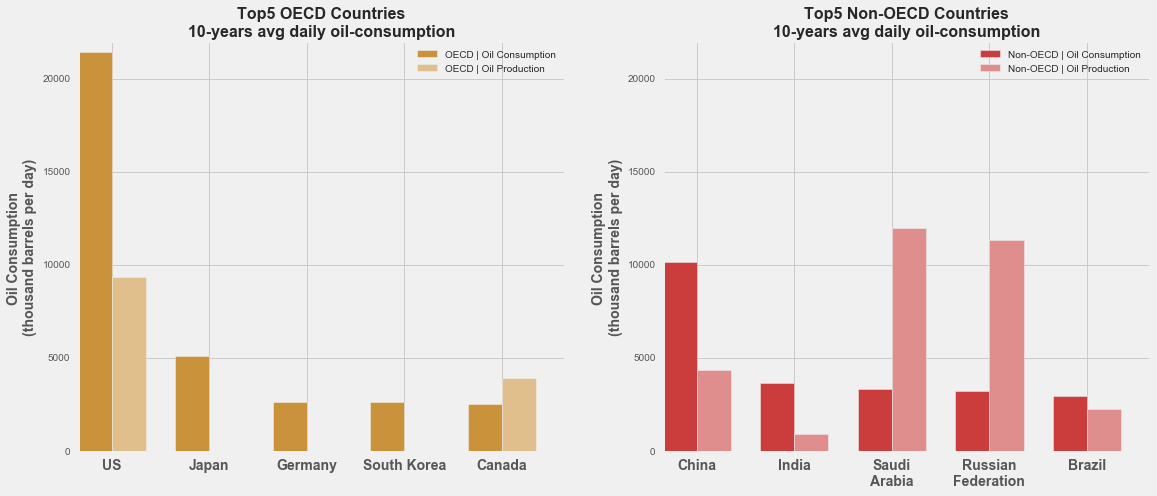

In [14]:
# Top5 Oil Consumers (by total daily consumption in the last 10 years)
fig = plt.figure(figsize=(10,12))
ax1 = fig.add_subplot(1,2,1)

ind = np.arange(5)
width = 0.35

x1 = df_oecd_average.index.tolist()
x2 = ['China', 'India', 'Saudi\nArabia', 'Russian\nFederation', 'Brazil']

# OECD
y1 = df_oecd_average['oil_consumption']
y2 = df_oecd_average['oil_production']
ax1.bar(ind, y1, width, color='#cb923c', label="OECD | Oil Consumption")
ax1.bar(ind+width, y2, width, color='#e0bf8d', label="OECD | Oil Production")
plt.legend()

# Non-OECD
y3 = df_non_oecd_average['oil_consumption']
y4 = df_non_oecd_average['oil_production']
ax2 = fig.add_subplot(1,2,2)
ax2.bar(ind, y3, width, color='#cb3c3c', label="Non-OECD | Oil Consumption")
ax2.bar(ind+width, y4, width, color='#e08d8d', label="Non-OECD | Oil Production")

fig.subplots_adjust(bottom=0.025, left=0.01, top = 0.5, right=1.5, wspace=0.2)

ax1.set_xticks(ind+width)
ax1.set_xticklabels(x1, weight='bold', fontsize=14)
ax2.set_xticks(ind+width)
ax2.set_xticklabels(x2, weight='bold', fontsize=14)
ax1.set_ylabel("Oil Consumption \n(thousand barrels per day)", weight='bold', fontsize=14)
ax2.set_ylabel("Oil Consumption \n(thousand barrels per day)", weight='bold', fontsize=14)
ax1.set_title("Top5 OECD Countries\n10-years avg daily oil-consumption", weight='bold', fontsize=16)
ax2.set_title("Top5 Non-OECD Countries\n10-years avg daily oil-consumption", weight='bold', fontsize=16)

mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
ax1.set_ylim(0,22000)
ax2.set_ylim(0,22000)
plt.legend()

plt.show()

OECD (Organisation for Economic Co-operation and Development) is an intergovernmental economic organisation with 35 member countries, founded in 1960 to stimulate economic progress and world trade. Many of the members are advanced economy countries in US and Europe / Asia.

We are going to use OECD as a means to group countries for the purpose of oil consumption analysis.

The figure above shows oil consumption for both groups, OECD and Non-OECD countries, represented by 5 countries with the most daily consumption of oil.

Among the 5 countries in OECD group, Canada is the only country which effectively is a net-exporter. US, Japan, Germany and South Korea rely on oil imports from other producing countries.

On the Non-OECD group, Saudi Arabia and Russia are the two net-exporting countries while China, India and Brazil relies on oil imports at different levels.

Most of top oil consumers rely on oil imported from net-producer countries.

### OECD vs Non-OECD Total Consumption (20 years data)

In [15]:
df_oecd_consumption = df_oecd.groupby('year').agg(sum)['oil_consumption']
df_non_oecd_consumption = df_non_oecd.groupby('year').agg(sum)['oil_consumption']

In [16]:
df_consumption = pd.concat([df_oecd_consumption, df_non_oecd_consumption], axis=1)

In [17]:
df_consumption['OECD Consumption'] = df_consumption.iloc[:,0]
df_consumption['Non OECD Consumption'] = df_consumption.iloc[:,1]

In [18]:
df_consumption = df_consumption.drop('oil_consumption', axis=1)

In [19]:
df_consumption = df_consumption.tail(21)

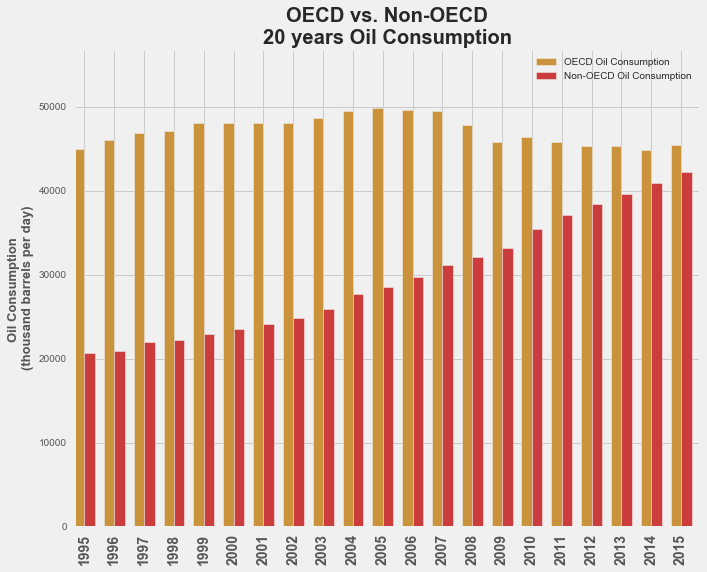

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)

ind = np.arange(21)
width = 0.35

x1 = np.arange(1995, 2016, 1)

# OPEC
y1 = df_consumption['OECD Consumption']
y2 = df_consumption['Non OECD Consumption']
ax.bar(ind, y1, width, color='#cb923c', label="OECD Oil Consumption")
ax.bar(ind+width, y2, width, color='#cb3c3c', label="Non-OECD Oil Consumption")
plt.legend()

ax.set_xticks(ind+width)
ax.set_xticklabels(x1, weight='bold', fontsize=14, rotation=90)
ax.set_ylabel("Oil Consumption \n(thousand barrels per day)", weight='bold', fontsize=13)
ax.set_title("OECD vs. Non-OECD\n20 years Oil Consumption", weight='bold')
ax.set_ylim(0, 57000)
ax.set_xlim(0,21)
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

plt.legend(loc='best')
plt.show()

When it comes to oil consumption, OECD countries have not improved as much in the last 20s years. There are some improvements between 1995 and 2005, around 50 million barrels However, Non-OECD countries' utilisation have been convincingly increasing year by year.

Clearly, economic growth are down to countries within the non-OECD group.

## C. Oil Reserves

### Total Country by Production vs Reserves (2015 data)

In [21]:
df_opec = df_nations[df_nations['opec']== 1]
df_non_opec = df_nations[df_nations['opec']== 0]
top5_df_non_opec = df_non_opec[df_non_opec['year']==2015]
top5_df_non_opec = top5_df_non_opec.groupby('country').agg(sum).sort_values('oil_production', ascending=False)
s = top5_df_non_opec[['oil_production', 'oil_reserves']]
print "Non Opec Production: ", s['oil_production'].sum()
print "Non Opec Reserves: ", s['oil_reserves'].sum()

Non Opec Production:  50987.9599882
Non Opec Reserves:  471.069901183


In [22]:
top5_df_opec = df_opec[df_opec['year']==2015]
top5_df_opec = top5_df_opec.groupby('country').agg(sum).sort_values('oil_production', ascending=False)
t = top5_df_opec[['oil_production', 'oil_reserves']]
print "Opec Production: ", t['oil_production'].sum()
print "Opec Reserves: ", t['oil_reserves'].sum()

Opec Production:  39283.2365871
Opec Reserves:  1217.23210454


In [23]:
print "Non Opec Production Proportion: ", s['oil_production'].sum()/(s['oil_production'].sum()+t['oil_production'].sum())
print "Opec Production Proportion: ", t['oil_production'].sum()/(t['oil_production'].sum()+s['oil_production'].sum())

Non Opec Production Proportion:  0.564830886512
Opec Production Proportion:  0.435169113488


In [24]:
print "Non Opec Reserves Proportion: ", s['oil_reserves'].sum()/(s['oil_reserves'].sum()+t['oil_reserves'].sum())
print "Opec Reserves Proportion: ", t['oil_reserves'].sum()/ (s['oil_reserves'].sum()+t['oil_reserves'].sum())


Non Opec Reserves Proportion:  0.279019926285
Opec Reserves Proportion:  0.720980073715


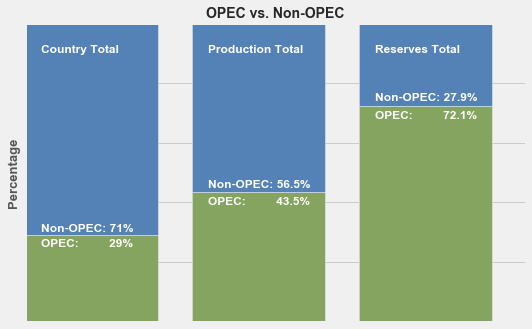

In [25]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
A = [29, 43.5, 72.1]
B = [71, 56.5, 27.9]

X = range(3)

plt.bar(X, A, color = '#85a460')
plt.bar(X, B, color = '#5482b7', bottom = A)
plt.title("OPEC vs. Non-OPEC", weight='bold', fontsize=14)
ax.set_ylabel("Percentage", fontsize=13, weight='bold')
plt.annotate("Country Total", xy=(0.1,85), xytext=(0.1,90), fontsize=12, color='white', weight='bold')
plt.annotate("Production Total", xy=(1.1,85), xytext=(1.1,90), fontsize=12, color='white', weight='bold')
plt.annotate("Reserves Total", xy=(2.1,85), xytext=(2.1,90), fontsize=12, color='white', weight='bold')
plt.annotate("OPEC:         29%", xy=(0.1,55), xytext=(0.1,25), fontsize=12, color='white', weight='bold')
plt.annotate("Non-OPEC: 71%", xy=(0.1,55), xytext=(0.1,30), fontsize=12, color='white', weight='bold')
plt.annotate("OPEC:         43.5%", xy=(1.1,55), xytext=(1.1,39), fontsize=12, color='white', weight='bold')
plt.annotate("Non-OPEC: 56.5%", xy=(1.1,55), xytext=(1.1,45), fontsize=12, color='white', weight='bold')
plt.annotate("OPEC:         72.1%", xy=(2.1,55), xytext=(2.1,68), fontsize=12, color='white', weight='bold')
plt.annotate("Non-OPEC: 27.9%", xy=(2.1,55), xytext=(2.1,74), fontsize=12, color='white', weight='bold')
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
plt.show()

The bar chart above illustrates the balance (or imbalance between OPEC and Non-OPEC based on total members, total producation and total reserves.

The 30% OPEC's producing countries are responsible for almost 45% or total world's oil production and over 70% of total worlds' oil reserves.



### Expanding World Oil Reserves

In [26]:
# Prepare DataFrame
df_groups = base[base['category']=='group']
df_1995 = df_groups[df_groups['year']==1995].reset_index().loc[0:6,:]
df_2005 = df_groups[df_groups['year']==2005].reset_index().loc[0:6,:]
df_2015 = df_groups[df_groups['year']==2015].reset_index().loc[0:6,:]
# Populate oil reserves data
percentage_1995 = []
percentage_2005 = []
percentage_2015 = []
for i in range(0,6,1):
    percentage_1995.append(df_1995.iloc[i,6] / df_1995.iloc[6,6])
    percentage_2005.append(df_2005.iloc[i,6] / df_2005.iloc[6,6])
    percentage_2015.append(df_2015.iloc[i,6] / df_2015.iloc[6,6])

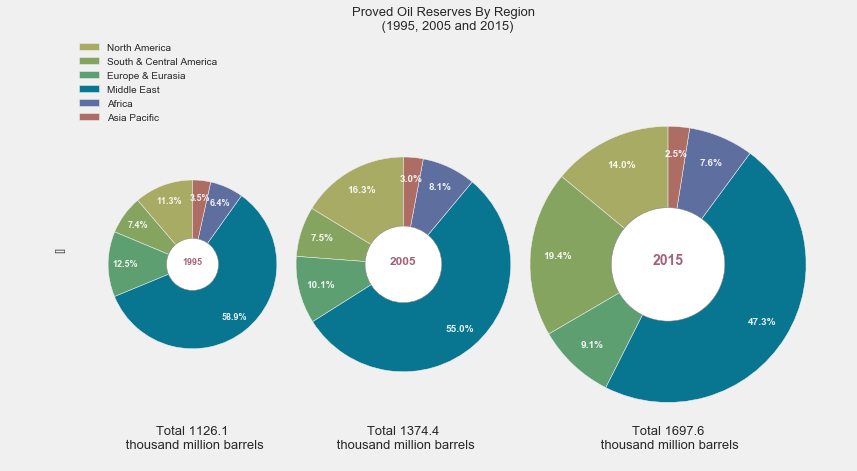

In [27]:
# Plot Donut Chart
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
mpl.rcParams['font.size'] = 9.0
labels = 'North America', 'South & Central America', 'Europe & Eurasia', 'Middle East', 'Africa', 'Asia Pacific'
colors = ['#a8ab64', '#85a460', '#5d9f71', '#087591', '#5d6e9f', '#ad6d65']
explode = (0, 0, 0, 0, 0, 0)

#Donut_1
patches, texts, autotexts = ax.pie(percentage_1995, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=False, startangle=90,
       radius=0.55, center=(0, 0), frame=True)
for t in texts:
    t.set_alpha(0.0)
for t in autotexts:
    t.set_size(9)
    t.set_alpha(0.9)
    t.set_color('white')
    t.set_weight('bold')
plt.legend(loc='upper left')

for patch, txt in zip(patches, autotexts):
    ang = (patch.theta2 + patch.theta1) / 2.
    x = (patch.r * 0.8 * np.cos(ang*np.pi/180))
    y = patch.r * 0.8 * np.sin(ang*np.pi/180)
    txt.set_position((x, y))

#Donut_2
patches, texts, autotexts = ax.pie(percentage_2005, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=False, startangle=90,
       radius=0.7, center=(1.375, 0), frame=True)
for t in texts:
    t.set_alpha(0.0)
for t in autotexts:
    t.set_size(10)
    t.set_alpha(0.9)
    t.set_weight('bold')
    t.set_color('white')

for patch, txt in zip(patches, autotexts):
    ang = (patch.theta2 + patch.theta1) / 2.
    x = 1.375+(patch.r * 0.8 * np.cos(ang*np.pi/180))
    y = patch.r * 0.8 * np.sin(ang*np.pi/180)
    txt.set_position((x, y))

#Donut_3
patches, texts, autotexts = ax.pie(percentage_2015, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=False, startangle=90,
       radius=0.9, center=(3.1, 0), frame=True)
for t in texts:
    t.set_alpha(0.0)
for t in autotexts:
    t.set_size(10)
    t.set_alpha(0.9)
    t.set_color('white')
    t.set_weight('bold')
    
for patch, txt in zip(patches, autotexts):
    ang = (patch.theta2 + patch.theta1) / 2.
    x = 3.1+(patch.r * 0.8 * np.cos(ang*np.pi/180))
    y = patch.r * 0.8 * np.sin(ang*np.pi/180)
    txt.set_position((x, y))

ax.add_artist(plt.Circle((0,0),0.17, color='grey', fc='white'))
ax.add_artist(plt.Circle((1.375,0),0.25, color='grey', fc='white'))
ax.add_artist(plt.Circle((3.1,0),0.37, color='grey', fc='white'))

ax.set_xticks([0, 1.375, 3.1])
ax.set_xlim((-0.8, 4.1))
ax.set_ylim((-1.3, 1.5))
ax.set_ylabel([])

plt.annotate('1995', xy=(0,0), xytext=(0,0), horizontalalignment='center', color='#a56079', weight='bold')
plt.annotate('2005', xy=(1.375,0), xytext=(1.375,0), horizontalalignment='center', color='#a56079', fontsize=12, weight='bold')
plt.annotate('2015', xy=(3.1,0), xytext=(3.1,0), horizontalalignment='center', color='#a56079', fontsize=14, weight='bold')
plt.annotate("Total 1126.1\n thousand million barrels", xy=(0, -1.2), xytext=(0,-1.2), horizontalalignment='center', fontsize=13)
plt.annotate("Total 1374.4\n thousand million barrels", xy=(1.375,-1.2), xytext=(1.375,-1.2), horizontalalignment='center', fontsize=13)
plt.annotate("Total 1697.6\n thousand million barrels", xy=(3.1,-1.2), xytext=(3.1,-1.2), horizontalalignment='center', fontsize=13)
plt.title("Proved Oil Reserves By Region \n (1995, 2005 and 2015)")
plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
ax.set_aspect('equal')
plt.grid(False)
plt.show()

New oil exploration works are conducted around the world to try to find new sources of hydrocarbon. These are done more in 'good-times' than in the 'bad-times'.

As new reserves are identified, they are tested and verified from technical and economic standpoints for further development and production viability (within a certain confidence level). This is where reservoir growth takes place as illustrated in the chart above. 

Note:

However, more often than not, these "proved oil reserves data" is non-audited data reported by producing country and is suspected to be manipulated for political reasons - says Wikipedia: [link](https://en.wikipedia.org/wiki/Oil_reserves).

Nevertheless, based on the data gathered:

- World's oil total reserves seems to have grown by 22%-24% every 10 years. Which means, the growth in 2015 compare to 1995 level is more than 50% (in fact, it is 50.7%).
- South & Central America reported to have the largest gain in the last 10 years.
- Even though North American countries underwent major drilling expansions in the last 10 years, thanks to the shale oil boom in the US, the proportion of its proved reserves, having considered new findings, shrunk by slightly less than 2% compare to 2005 level.

# C. Supply vs. Demand

In [28]:
df_by_region = base[base.category=='group'][['year', 'country', 'oil_production', 'oil_consumption']].sort_values('year')

In [29]:
df_by_region['country'].value_counts()

Total Middle East           51
OECD                        51
Total North America         51
Non-OPEC                    51
European Union              51
Total Asia Pacific          51
Total World                 51
Non-OECD                    51
Total Africa                51
OPEC                        51
CIS                         51
Total Europe & Eurasia      51
Total S. & Cent. America    51
Name: country, dtype: int64

In [30]:
df_by_region = df_by_region[(df_by_region['country']=='Total Africa')|(df_by_region['country']=='Total Middle East')|(df_by_region['country']=='Total North America')|(df_by_region['country']=='Total Asia Pacific') | (df_by_region['country']=='Total Europe & Eurasia') | (df_by_region['country']=='Total S. & Cent. America')]

In [31]:
df_by_region = df_by_region[df_by_region['year'] >= 1995]

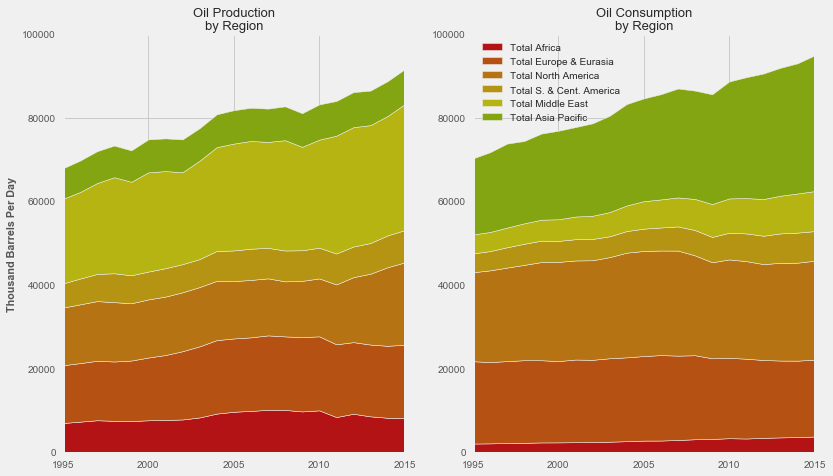

In [32]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
x = df_by_region[df_by_region['country']=='Total Africa']['year']
y1 = df_by_region[df_by_region['country']=='Total Africa']['oil_production']
y2 = df_by_region[df_by_region['country']=='Total Europe & Eurasia']['oil_production']
y3 = df_by_region[df_by_region['country']=='Total North America']['oil_production']
y4 = df_by_region[df_by_region['country']=='Total S. & Cent. America']['oil_production']
y5 = df_by_region[df_by_region['country']=='Total Middle East']['oil_production']
y6 = df_by_region[df_by_region['country']=='Total Asia Pacific']['oil_production']
leg1 = ax.stackplot(x, y1, y2, y3, y4, y5, y6, colors=('#b41315','#b55213','#b57313','#b59413','#b5b413','#82a511'))

y1 = df_by_region[df_by_region['country']=='Total Africa']['oil_consumption']
y2 = df_by_region[df_by_region['country']=='Total Europe & Eurasia']['oil_consumption']
y3 = df_by_region[df_by_region['country']=='Total North America']['oil_consumption']
y4 = df_by_region[df_by_region['country']=='Total S. & Cent. America']['oil_consumption']
y5 = df_by_region[df_by_region['country']=='Total Middle East']['oil_consumption']
y6 = df_by_region[df_by_region['country']=='Total Asia Pacific']['oil_consumption']


legs = ax1.stackplot(x, y1, y2, y3, y4, y5, y6, colors=('#b41315','#b55213','#b57313','#b59413','#b5b413','#82a511'))

ax.set_xlim(1995, 2015)
ax1.set_xlim(1995, 2015)
ax.set_title("Oil Production\nby Region")
ax1.set_title("Oil Consumption\nby Region")
ax.set_ylabel("Thousand Barrels Per Day", weight='bold')


plt.legend(legs, ['Total Africa', 'Total Europe & Eurasia', 'Total North America', 'Total S. & Cent. America', 'Total Middle East', 'Total Asia Pacific', 
                  ], loc='upper left')

plt.show()

Notes from the above chart:
- Africa: Stable production and consumption, albeit much less, over the years.
- Middle East: Increasing production and consumption - export most of the oil produced.
- North America: Increasing consumption with also increasing production, however still not enough to supply domestic consumption.
- Asia Pacific: Significant increase year on year on oil consumption. Also, consume much more than produce.
- Europe and Eurasia: higher consumption than production, steadily increasing over the years.
- South and Central America: steady production and consumption over the years.

Key findings:
- Oil consumption in the Asia Pacific drives growth of the overall world's oil consumption. With the same level of production, this only emphasise the more dependencies on imported oil from other countries such as the middle east.
- Sharp increase in the US Oil Production in the last 5 years is due to Shale Oil operations. This increase helps to satisfy the huge local demand for oil and therefore to reduce dependencies on imported oil.

# D. Production vs. GDP vs. Oil Price

In [33]:
df_oil_price = df_oil_price.sort_values('year').set_index('year', drop=True)

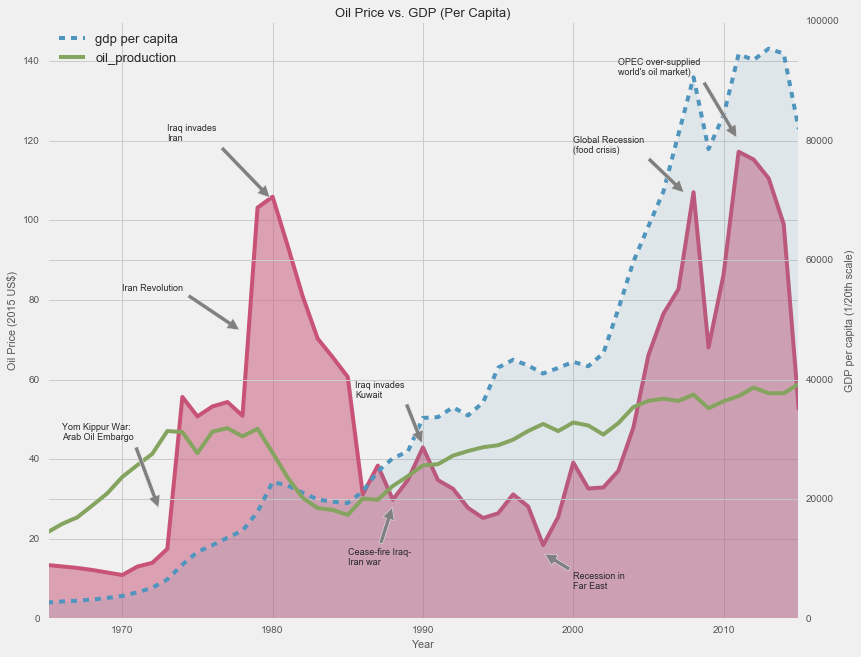

In [34]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(1,1,1)
ax1.set_ylim(0,150)
ax2 = ax1.twinx()
ax2.set_ylim(0, 100000)
ax1.set_xlim(1965,2015)
x = df_oil_price.index
y1 = df_oil_price['oil_2015_price']
y2 = df_total_world.groupby('year').agg('sum')['gdp']/20
y3 = df_opec_total['oil_production']
ax1.plot(x, y1, '-', color='#c85376')
ax2.plot(x, y2, '--', color='#4f95be')
ax1.fill_between(x, y1, 0, facecolor='#c85376', alpha=0.5)
ax2.fill_between(x, y2, 0, facecolor='#4f95be', alpha=0.1)
ax2.plot(x, y3, '-', c='#85a460')
ax2.annotate('Yom Kippur War:\nArab Oil Embargo', xy=(1972.5, 18000), xytext=(1966, 30000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
ax2.annotate('Iran Revolution', xy=(1978, 48000), xytext=(1970, 55000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
ax2.annotate('Iraq invades\nIran', xy=(1980, 70000), xytext=(1973, 80000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
ax2.annotate('Cease-fire Iraq-\nIran war', xy=(1988, 19000), xytext=(1985, 9000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
ax2.annotate('Iraq invades\nKuwait', xy=(1990, 29000), xytext=(1985.5, 37000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
ax2.annotate('Recession in\nFar East', xy=(1998, 11000), xytext=(2000, 5000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
ax2.annotate('Global Recession\n(food crisis)', xy=(2007.5, 71000), xytext=(2000, 78000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
ax2.annotate('OPEC over-supplied\nworld\'s oil market)', xy=(2011, 80000), xytext=(2003, 91000),
             arrowprops=dict(facecolor='grey', shrink=0.05))
plt.legend(('gdp per capita', 'oil_production'), loc='best', fontsize=13)
plt.title("Oil Price vs. GDP (Per Capita)")
ax1.set_ylabel("Oil Price (2015 US$)")
ax2.set_ylabel("GDP per capita (1/20th scale)")
ax1.set_xlabel("Year")
plt.show()

The chart above tries to loosely extract cause-and-effect relationship that may take place between oil-price, oil-production, gdp and significant world events during the timeline.

**Arab Oil Embargo (Yom Kippur War) in 1973** 

The embargo brought the price up and impacted production level.

**Iran Revolution in 1979**

The revolution seemed to have an effect on oil-production.

**Iraq invades Iran in 1980**

Price drop as demand was weak (gdp downtrend) which resulted in drops in oil production. Economic activities started to pick-up again around 1985 signified by increase in oil-production and gdp.

**Cease-fire Iran-Iraq war in 1988**

Even though the price fluctuated, due to strong demand for oil, oil-production continue to increase resulting in increased gdp.

**Iraq invades Kuwait (Gulf War) in 1990

Invasion of Iraq to Kuwait sent the price down however, with continuing production and gdp increase. (cheap oil)

**Recession in Far East in 1998**

Again, with cheap oil, oil-production continued to increase which fuel further growth.

**Global Recession in 2008**

Oil-price dropped due to slowed-down economy as food-crisis kicked in. However, economic activities started to pick up again within a couple of years.

**OPEC over-supplied oil market in 2011-16**

Peak shale oil productions in the US meant less dependency on imported oil. However, OPEC refused to reduce production level which resulted in over-supply of oil bringing the world's oil price down, until today.


---

## Pre-Processing

### Feature Selection

In [35]:
base.dtypes

year                 int64
country             object
gas_reserves       float64
gas_production     float64
gas_consumption    float64
oil_reserves       float64
oil_production     float64
oil_consumption    float64
gdp                float64
category            object
gdp_gr             float64
oil_2015_price     float64
opec                 int64
region              object
oecd                 int64
dtype: object

In [47]:
columns = ['gas_reserves', 'gas_production', 'gas_consumption', 'oil_reserves', 'oil_consumption', 'oil_production', 'gdp', 'gdp_gr', 'oil_2015_price']

In [48]:
X = df_nations[columns]

In [49]:
X = X.dropna()

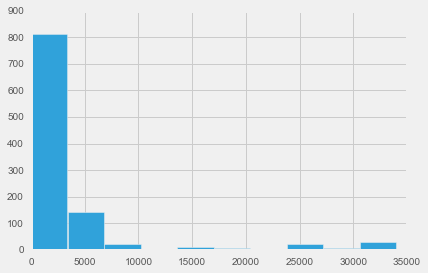

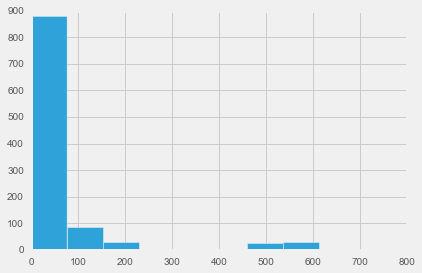

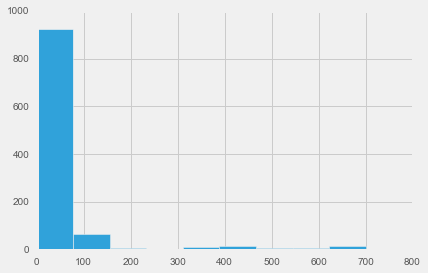

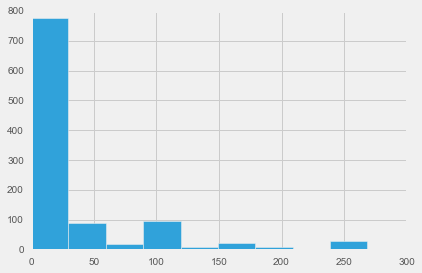

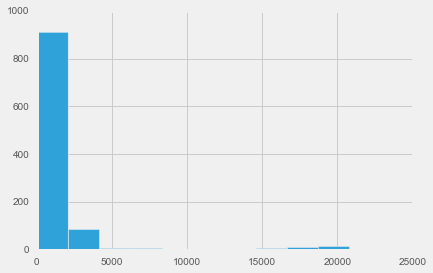

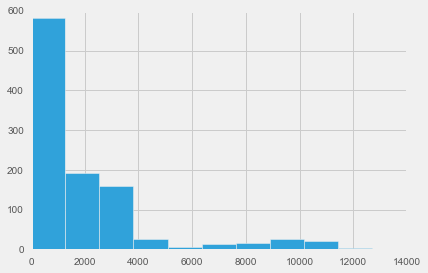

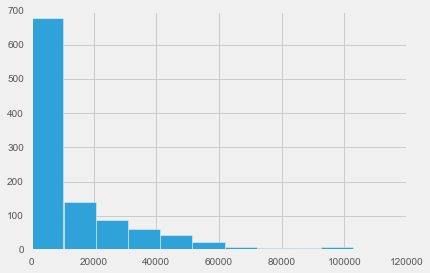

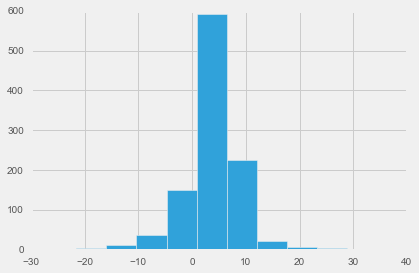

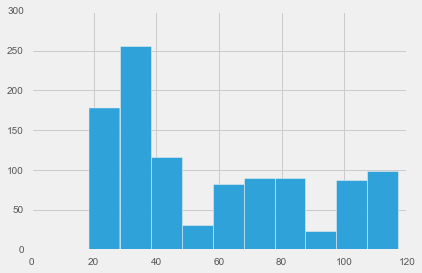

In [50]:
for i in range(0,9,1):
    X.iloc[:,i].hist()
    plt.show()

### Clustered Data Analysis

In [51]:
# Prepare Data
df_nations_cl = df_nations.drop(['year', 'country', 'category', 'opec', 'region', 'oecd'], axis=1).dropna()
X_cl = df_nations_cl

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cl_scaled = scaler.fit_transform(X_cl)

In [53]:
# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_cl_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [54]:
df_nations_cl['cluster'] = km.labels_
centers = df_nations_cl.groupby('cluster').mean()

In [55]:
colors = np.array(['#5482b7', '#e95b6c', '#a483b5', '#85a460', '#f4ed9f', '#f2cf56', '#cacace', '#2c436c', '#d79459', '#4fbe7b' , '#89c652', '#cad357'])

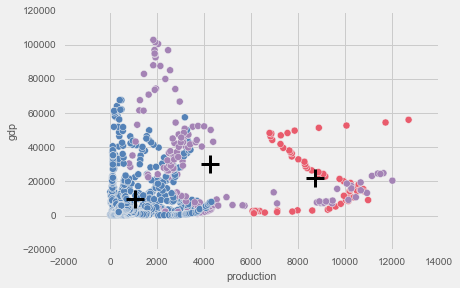

In [56]:
plt.scatter(df_nations_cl.oil_production, df_nations_cl.gdp, c=colors[df_nations_cl.cluster], s=50)
# cluster centers, marked by "+"
plt.scatter(centers.oil_production, centers.gdp, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('production')
plt.ylabel('gdp')
plt.grid(True)

From Silhouette Coefficient stand-point, the best value can be obtained with K = 2. For K >= 4, the Silhouette Coefficient does not change very much, settles in the range of 0.25 - 0.325. This range does not give a strong and convincing separations between the data point as they are too close to the decision boundaries. K = 3 gives a higher silhouette coefficient, more separations however still less than with can be achieved with k=2.

Looking at the cluster chart with K=3 above, even using a 'conceptual-distance' clustering to interpret the result, there is a lack of certainty on cluster separation on two of the closest centres as many of the data point are overlaps. For this reason, a cluster with K=2 will be used as per below:

The below is an attempt to use K-Means clustering using K=2

In [57]:
scaler = StandardScaler()
X_cl_scaled = scaler.fit_transform(X_cl)

In [58]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(X_cl_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [59]:
df_nations_cl['cluster'] = km.labels_
centers = df_nations_cl.groupby('cluster').mean()

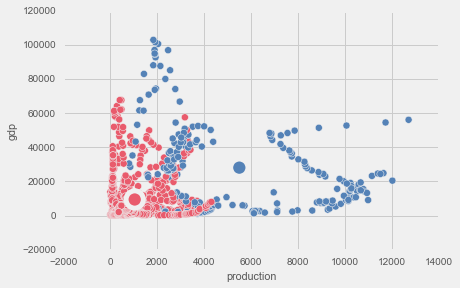

In [60]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df_nations_cl.oil_production, df_nations_cl.gdp, c=colors[df_nations_cl.cluster], s=50)

# cluster centers, marked by "O"
plt.scatter(centers.oil_production, centers.gdp, linewidths=5, marker='o', s=300, c=colors)

# add labels
plt.xlabel('production')
plt.ylabel('gdp')

The chart shows two centres of production vs. gdp per capita data point. This signifies the fact that the countries are represented by two groups, (i) lower production with lower gdp   and (ii) higher oil production and higher gdp. There are some overlaps between the two groups as illustrated in the graph.

# III. Model Developments

## A. Linear Model

In [61]:
df_n_opec = df_nations[(df_nations['country']=='US')|(df_nations['country']=='Russian Federation')
                 |(df_nations['country']=='Canada')|(df_nations['country']=='China')
                 |(df_nations['country']=='Mexico')|(df_nations['country']=='Saudi Arabia')
                 |(df_nations['country']=='Iran')|(df_nations['country']=='United Arab Emirates')
                 |(df_nations['country']=='Venezuela')|(df_nations['country']=='Kuwait')]

In [62]:
df_n_opec_all = df_n_opec[['gas_reserves', 'gas_production', 'gas_consumption', 'oil_production', 'oil_reserves', 'oil_consumption', 'gdp', 'gdp_gr', 'oil_2015_price']].dropna()

In [63]:
ys = df_n_opec_all['gdp']
Xs = df_n_opec_all.drop('gdp', axis=1)
Xs = sm.add_constant(Xs)

In [64]:
model = sm.OLS(ys, Xs)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     44.56
Date:                Mon, 13 Feb 2017   Prob (F-statistic):           3.56e-48
Time:                        14:37:52   Log-Likelihood:                -3616.6
No. Observations:                 339   AIC:                             7251.
Df Residuals:                     330   BIC:                             7286.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const            9306.4953   1642.496     

#### Model Assessment

The R-squared = 0.519 shows that around half of the data-points variance remains un-explained.

The model intercept is at $ B_0 = 9306 $ which shows that without any considerations of the features used, the gdp is estimated at the 9,306 US$ point.

From the total of 8 features used in the above model, four features come with a positive coefficient. For example, oil-reserves correlate positively with gdp with a very small p-values. In fact, in the model, all predictors have p-values with 95% confidence level.

The data is positively skewed (0.285), within the boundary of what is considered to be a normally distributed data (-0.8< skewness < 0.8).

A closer look at the data is needed to look at possible ways to improve the model.

#### GDP Data vs Oil Production Plot

A plot of oil_production vs. gdp (per capita) for all top 10 oil-producing countries is shown below.

Data seems to group into two clusters at the cut-off point around 6 million barrels per day (mbpd). The majority is located below the 6 mbpd point. Due to this split of data, it may be more problematic for a liner regression algorithm to model the data into a single linear line.

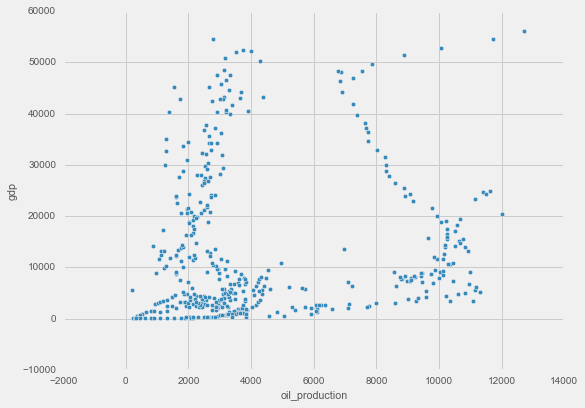

In [65]:
df_n_opec.plot(kind='scatter', x='oil_production', y='gdp', figsize=(8,6))

### Fat-Tailed Distribution

Looking closer at the oil_production data, it seems that the data forms a fat-tailed distribution, illustrated in the histogram below. There is a presence of quite a number of datapoints in the 'higher-zone' of the oil_production scale. These 'outliers' are not due to data-entry mistakes but are genuine / valid data pertaining to  countries producing oil at 2x or 3x the volume of other countries.

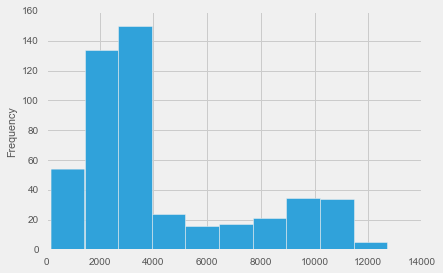

In [66]:
df_n_opec['oil_production'].plot(kind='hist')

The data-points at the tail of the curve above belong to oil production data of the 4 largest oil producing countries, i.e. US, Saudi Arabia, Russia and Iran. The below plot shows that the four countries, over the 50 years period, are responsible for producing oil above the 6 million barrels per day.

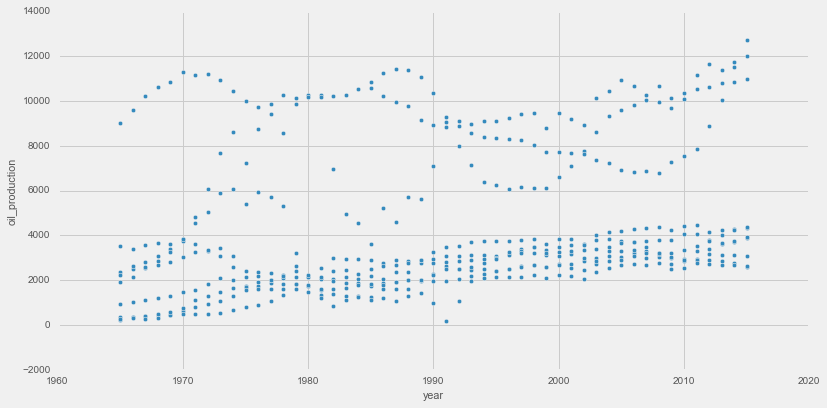

In [67]:
df_n_opec = df_n_opec.sort_values("year")
df_n_opec.plot(kind='scatter', x='year', y='oil_production', figsize=(12, 6))

#### Approach to Solution on Fat-Tailed Distribution Problem

The following approaches suggested and followed up in order to address this particular data issues:

1. Select only one group of data (all data except the 'outliers' such as US, Russia, Saudi Arabia and Iran) and build a liniear model prediction based on this group of data.

2. Apply some statistically accpetable transformation mechanism unto the data in order to obtain a more normally distributed data (the overall data set) and apply model prediction.

3. Utilise a statistical model that can perform well in a higher-dimensional data.

Approach #1 was conducted however results are not presented in this notebook. The the dataset do form a normal distribution and the R2 gets to a higher level (i.e. 0.63). However, this solution may not be the best approach as some data with useful information is discarded / not used.

Approach #2 was conducted and can be found in the following section.

Approach #3 also conducted and can be found in the subsequent section to Logarithmic Transoformation.

## Logarithmic Transformation

In [68]:
df_top10_log = df_n_opec.drop(['year', 'country', 'category', 'opec', 'oecd', 'region'], axis=1)

In [69]:
df_top10_log.describe()

,gas_reserves,gas_production,gas_consumption,oil_reserves,oil_production,oil_consumption,gdp,gdp_gr,oil_2015_price
count,349.000000,445.000000,490.000000,349.000000,490.000000,490.000000,465.000000,464.000000,510.000000
mean,7511.952553,131.853619,115.485226,93.438605,4242.220648,3124.181990,12848.494092,4.107221,50.279804
std,9444.125908,199.087954,189.135758,73.791811,3108.578500,5195.407841,14142.316094,6.425587,31.443412
min,324.154317,0.500000,0.000000,10.816400,185.000000,1.545560,91.472718,-21.599649,10.980000
25%,1748.000026,13.230000,10.237906,35.054000,2133.250000,408.943920,2426.186567,1.399771,26.460000
50%,4120.800018,33.740600,29.725460,92.849998,3088.425000,1317.700096,7023.787376,3.985271,39.220000
75%,6436.999798,124.949100,87.585450,107.766700,5718.489726,2319.945287,19545.193450,7.342758,70.320000
max,34020.000458,767.284864,777.970256,300.878006,12703.554000,20802.160383,56115.718426,33.990467,117.230000


In [70]:
df_top10_log = np.log10(df_top10_log)

/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


In [71]:
df_top10_log.describe()

,gas_reserves,gas_production,gas_consumption,oil_reserves,oil_production,oil_consumption,gdp,gdp_gr,oil_2015_price
count,349.000000,445.000000,490.000000,349.000000,490.000000,490.000000,465.000000,382.000000,510.000000
mean,3.599940,1.618447,-inf,1.823951,3.508245,3.013833,3.761697,0.643263,1.606112
std,0.486891,0.694945,NaN,0.380482,0.341800,0.722187,0.651203,0.408929,0.302160
min,2.510752,-0.301030,-inf,1.034083,2.267172,0.189086,1.961292,-1.583103,1.040602
25%,3.242541,1.121560,1.010211,1.544738,3.329042,2.611663,3.384924,0.454820,1.422590
50%,3.614982,1.528153,1.473129,1.967782,3.489736,3.119814,3.846571,0.681069,1.593508
75%,3.808683,2.096733,1.942431,2.032485,3.757281,3.365477,4.291040,0.914638,1.847079
max,4.531734,2.884957,2.890963,2.478390,4.103925,4.318108,4.749085,1.531357,2.069039


In [72]:
df_top10_log = df_top10_log.dropna()

In [73]:
y = df_top10_log['gdp']
X = df_top10_log.drop('gdp', axis=1)
X = sm.add_constant(X)

In [74]:
model = sm.OLS(y, X)
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     41.57
Date:                Mon, 13 Feb 2017   Prob (F-statistic):           1.14e-42
Time:                        14:37:59   Log-Likelihood:                -133.88
No. Observations:                 274   AIC:                             285.8
Df Residuals:                     265   BIC:                             318.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
const               5.9974      0.522     

The R2 accuracy is now 0.557.

The p-values for both `gdp_gr` is very high, much larger than 5% and therefore are not suitable predictors.

Interestingly, both oil_production and oil_consumption have negative directions, unlike gas_conumption and oil_reserves.

### Oil Consumption vs. GDP Cluster

In [75]:
df_top10_log = df_top10_log.dropna()
X_log = df_top10_log

In [76]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_log)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [77]:
df_top10_log['cluster'] = km.labels_
centers = df_top10_log.groupby('cluster').mean()

In [78]:
colors = np.array(['#5482b7', '#e95b6c', '#a483b5', '#85a460', '#f4ed9f', '#f2cf56', '#cacace', '#2c436c', '#d79459', '#4fbe7b' , '#89c652', '#cad357'])

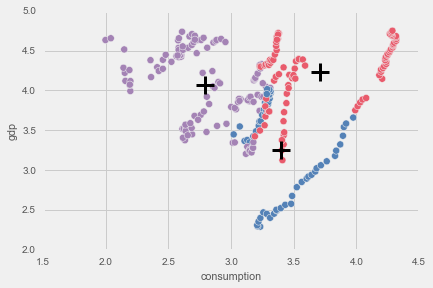

In [79]:
plt.scatter(df_top10_log.oil_consumption, df_top10_log.gdp, c=colors[df_top10_log.cluster], s=50)
# cluster centers, marked by "+"
plt.scatter(centers.oil_consumption, centers.gdp, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('consumption')
plt.ylabel('gdp')
plt.grid(True)

In [80]:
df_top10_log.corr()

,gas_reserves,gas_production,gas_consumption,oil_reserves,oil_production,oil_consumption,gdp,gdp_gr,oil_2015_price,cluster
gas_reserves,1.000000,0.456607,0.445810,0.538200,0.504987,0.128810,0.109661,-0.025584,0.046358,0.392743
gas_production,0.456607,1.000000,0.983418,0.027276,0.673076,0.770368,0.347127,-0.164449,0.119080,-0.199316
gas_consumption,0.445810,0.983418,1.000000,-0.028475,0.718627,0.813276,0.328878,-0.158820,0.146838,-0.221779
oil_reserves,0.538200,0.027276,-0.028475,1.000000,0.262565,-0.362141,0.386611,-0.198375,0.045134,0.616196
oil_production,0.504987,0.673076,0.718627,0.262565,1.000000,0.642690,0.182965,-0.125277,0.107239,-0.121642
oil_consumption,0.128810,0.770368,0.813276,-0.362141,0.642690,1.000000,-0.012503,-0.011567,0.085806,-0.550094
gdp,0.109661,0.347127,0.328878,0.386611,0.182965,-0.012503,1.000000,-0.262965,0.237439,0.443550
gdp_gr,-0.025584,-0.164449,-0.158820,-0.198375,-0.125277,-0.011567,-0.262965,1.000000,0.111520,-0.172900
oil_2015_price,0.046358,0.119080,0.146838,0.045134,0.107239,0.085806,0.237439,0.111520,1.000000,-0.083951
cluster,0.392743,-0.199316,-0.221779,0.616196,-0.121642,-0.550094,0.443550,-0.172900,-0.083951,1.000000


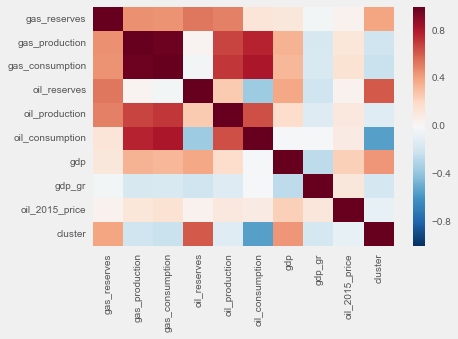

In [81]:
sns.heatmap(df_top10_log.corr())

From the correlation chart above, it appears that there are a number of correlated features in the predictors, which could result in multicolinearity when used in predictive models. Correlated features are:

- gas_production is highly correlated with gas_consumption. This makes sense as the industry mostly sell gas on a long term contract. For example, all lng to be produced in the next 25 years have already been subjected to a contract sales. As soon as LNG is produced, most will be shipped directly to customers location.

- Oil_reserves has a negative correlation with oil_consumption. In real terms, it may mean that the less a  country has oil reserves the more likely they consume.

- There are also indication of correlations between gas_production, oil_production, oil_consumption.


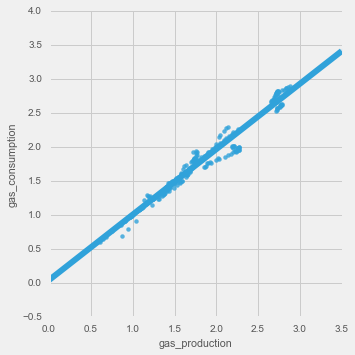

In [82]:
sns.lmplot(x='gas_production', y='gas_consumption', data=df_top10_log)

The log-transformed values of gas_production and gas_consumption is highly correlated as showed in the figure above. This makes a perfect sense as, unlike oil, the majority of gas produced has been procured even prior to production. 

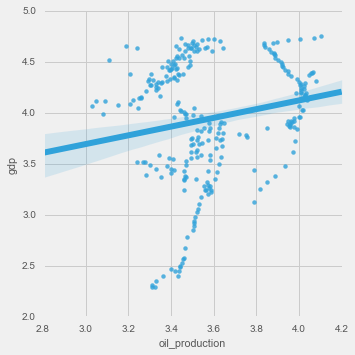

In [83]:
sns.lmplot(x='oil_production', y='gdp', data=df_top10_log)

## B. Decision Tree Classifier and Ensemble Method

#### Create DataFrame

In [84]:
df_dtree = df_nations[(df_nations['country']=='US')|(df_nations['country']=='Russian Federation')
                 |(df_nations['country']=='Canada')|(df_nations['country']=='China')
                 |(df_nations['country']=='Mexico')|(df_nations['country']=='Saudi Arabia')
                 |(df_nations['country']=='Iran')|(df_nations['country']=='United Arab Emirates')
                 |(df_nations['country']=='Venezuela')|(df_nations['country']=='Kuwait')]
df_dtree = df_dtree[['gas_reserves', 'gas_production', 'gas_consumption', 'oil_reserves', 'oil_production', 'oil_consumption', 'gdp', 'gdp_gr', 'opec', 'oecd', 'region']].dropna()

In [85]:
df_region = pd.get_dummies(df_dtree['region'], drop_first=True)
df_dtree_class = df_dtree[['gas_reserves', 'gas_production', 'gas_consumption', 'oil_reserves', 'oil_production', 'oil_consumption', 'gdp', 'gdp_gr', 'opec', 'oecd']]
df_dtree = pd.concat([df_dtree_class, df_region], axis=1)

#### Define Classification Criterion

In [86]:
# 'Growing' Economy when GDP Growth Rate > 2
df_dtree['gdp_gr'] = df_dtree['gdp_gr'].apply(lambda x: 1 if x > 2 else 0)

#### Prepare Model

In [87]:
column_names = df_dtree.drop('gdp_gr', axis=1).columns.tolist()
yd = df_dtree.gdp_gr
Xd = df_dtree.drop('gdp_gr', axis=1)

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
Xd = scaler.fit_transform(Xd)
Xd = pd.DataFrame(Xd, columns=column_names)
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.3, random_state=42)

#### Null Accuracy

In [89]:
s = pd.Series(yd)
s.value_counts()/s.count()

1    0.666667
0    0.333333
Name: gdp_gr, dtype: float64

There is a slight imbalance evident in the GDP Growth Rate classification data. About 66.7% of the data has a GDP growth rate greater than 2% and only 33.3% of the total in the sample with 'stagnating' / 'contracting' economies.

#### Model Score - Confusion Matrix

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print 'Accuracy score: '
print accuracy_score(y_test,predictions)
print 
conf = confusion_matrix(y_test, model.predict(X_test))
predicted_cols = ['pred_'+str(c) for c in yd.unique()]

print 'Confusion matrix: '
print pd.DataFrame(conf, index = yd.unique(), columns = predicted_cols)
print 
print 'Classification report: '
print classification_report(y_test,model.predict(X_test))

Accuracy score: 
0.647058823529

Confusion matrix: 
   pred_0  pred_1
0       3      31
1       5      63

Classification report: 
             precision    recall  f1-score   support

          0       0.38      0.09      0.14        34
          1       0.67      0.93      0.78        68

avg / total       0.57      0.65      0.57       102



#### Cross-Validated Score

In [91]:
from sklearn.cross_validation import cross_val_score

for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(model, Xd, yd, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

mean accuracy: 0.509857331382, all: [ 0.63157895  0.42477876  0.47321429]
mean precision: 0.615230536659, all: [ 0.67346939  0.58333333  0.58888889]
mean recall: 0.680584795322, all: [ 0.86842105  0.46666667  0.70666667]
mean roc_auc: 0.36336477752, all: [ 0.49861496  0.39526316  0.19621622]


/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Tree Diagram

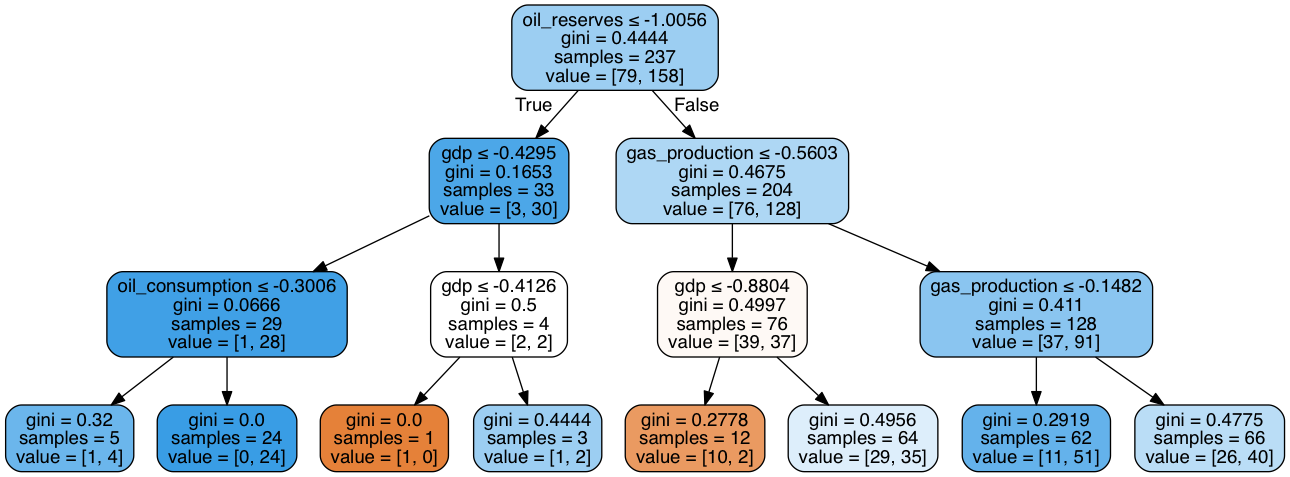

In [92]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus

dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,  
                feature_names=column_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Feature Importance

In [93]:
# compute the feature importances
pd.DataFrame({'feature':column_names,
              'importance':model.feature_importances_}).sort_values('importance',
                                                                      ascending=False).head(5)

,feature,importance
1,gas_production,0.439047
6,gdp,0.288215
3,oil_reserves,0.254073
5,oil_consumption,0.018665
0,gas_reserves,0.000000


#### Use GridSearch for Parameter Optimisation

In [94]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=1)
#Grid Search
PARAMETERS = {'max_depth':[1,2,3,4,5,6],
              #, 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4]
              #'min_samples_split':[1,2,3,4]
             }
SCORING = 'accuracy'
clf = GridSearchCV(model, PARAMETERS, scoring=SCORING,cv=5)
clf.fit(Xd, yd)
model = clf.best_estimator_

#After completion, show the final best results and scores
print clf.best_estimator_
print clf.best_score_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=5, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')
0.498525073746


In [95]:
from sklearn.metrics import roc_curve, auc

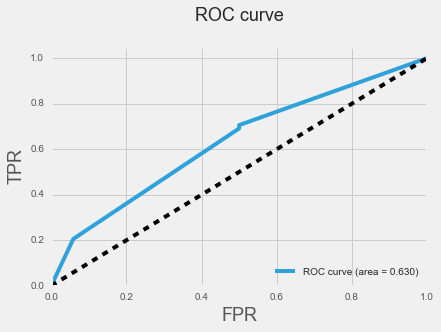

In [96]:
model.fit(X_train,y_train)
y_pr = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pr)
ROC_AUC = auc(fpr,tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % ROC_AUC, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.title('ROC curve\n', fontsize=18)
plt.legend(loc="lower right")
plt.show()

The AUC of the model is 63.5%, which is slighly higher than the 50% threshold.

---

## Decision Tree on Ensemble Model

#### Prepare DataFrame

In [103]:
yensm = df_dtree.gdp_gr
Xensm = df_dtree.drop('gdp_gr', axis=1)
col_names = Xensm.columns

In [104]:
scaler = StandardScaler()
Xensm = scaler.fit_transform(Xensm)
Xensm = pd.DataFrame(Xensm, columns=col_names)

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ypred1 = le.fit_transform(yensm)
Xpred1 = Xensm

#### Cross-validated DecisionTreeClassifier

In [106]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier()
def do_cross_val(model):
    scores = cross_val_score(model, Xpred1, ypred1, cv=5, n_jobs=-1)
    return scores.mean(), scores.std()

do_cross_val(dt)

(0.41735567685867342, 0.1677343332532201)

#### BaggingClassifier

In [107]:
bdt = BaggingClassifier(DecisionTreeClassifier())
do_cross_val(bdt)

/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed para

(0.34641243908335556, 0.16893318879558714)

The result is smaller than the cross-validated DT score. This may be due to bagging's ability to reduce variance and overfitting that may be the case with cross-validated DT score.

#### DT on Scaled Data using RobustScaler

In [108]:
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
pipedt = make_pipeline(RobustScaler(),
                       DecisionTreeClassifier())

pipebdt = make_pipeline(RobustScaler(),
                        BaggingClassifier(DecisionTreeClassifier()))

In [109]:
do_cross_val(pipedt)

(0.41735567685867342, 0.1677343332532201)

Apparently taking outliers into considerations as part of Robust Scaling does improve the accuracy score a little.

#### Bagging - DT on Scaled Data using RobustScaler

In [598]:
do_cross_val(pipebdt)

/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed para

(0.36103306994439566, 0.17441061286638282)

Again, bagging doest the job in penalising the model to count for overfitting. This results in a smaller accuracy score.

#### Use of GridSearchCV to Find Best Parameters

In [567]:
from sklearn.grid_search import GridSearchCV

In [568]:
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    

gsdt = GridSearchCV(dt, params, n_jobs=-1, cv=5)

In [569]:
gsdt.fit(Xpred1, ypred1)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [570]:
gsdt.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 5}

In [571]:
gsdt.best_score_

0.5663716814159292

#### Bagging DT Classifier using GridSearchCV

In [572]:
bdt.get_params()

{'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_split': 1e-07,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose':

In [573]:
params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }
    

gsbdt = GridSearchCV(bdt, params, n_jobs=-1, cv=5)

In [574]:
gsbdt.fit(Xpred1, ypred1)

/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed para

GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
        ...n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [2, 5, 10, 20], 'max_samples': [0.5, 0.7, 1.0], 'base_estimator__min_samples_split': [2, 5, 7], 'base_estimator__max_depth': [3, 5, 10, 20], 'bootstrap_features': [False, True], 'max_features': [0.5, 0.7, 1.0], 'base_estimator__min_samples_leaf': [1, 3, 5, 7, 10], 'base_estimator__max_features': [None, 'auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [575]:
gsbdt.best_params_

{'base_estimator__max_depth': 3,
 'base_estimator__max_features': 'auto',
 'base_estimator__min_samples_leaf': 10,
 'base_estimator__min_samples_split': 7,
 'bootstrap_features': True,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 5}

In [537]:
gsbdt.best_score_

0.8171091445427728

---

# C. Time Series Analysis of US GDP Data

In [84]:
df_nations = base[base['category']=='nation']

Refining Time Series using Descriptive Statistics and visualizations to Identify Patterns.

In [85]:
df_n_opec = df_nations[(df_nations['country']=='US')|(df_nations['country']=='Russian Federation')
                 |(df_nations['country']=='Canada')|(df_nations['country']=='China')
                 |(df_nations['country']=='Mexico')|(df_nations['country']=='Saudi Arabia')
                 |(df_nations['country']=='Iran')|(df_nations['country']=='United Arab Emirates')
                 |(df_nations['country']=='Venezuela')|(df_nations['country']=='Kuwait')]

In [86]:
df_n_opec.loc[:,'year'] = pd.to_datetime(df_n_opec.loc[:,'year'], format='%Y')

/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
df_n_opec.set_index('year', inplace=True)
df_n_opec.sort_index(ascending=True, inplace=True)
df_n_opec.loc[:,'year_x'] = df_n_opec.index.year

/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


### GDP Growth Rate for OECD and Non-OECD Countries (Top-10 Consumers)

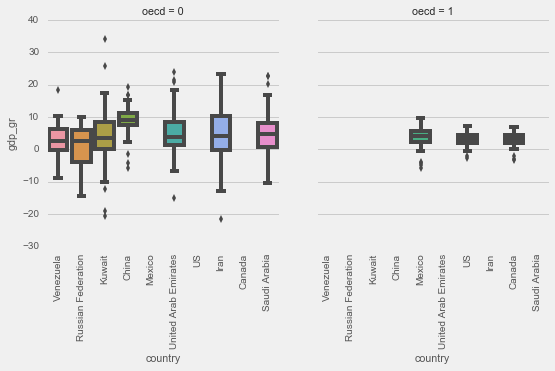

In [88]:
plt.figure(figsize=(12,6))
g = sns.factorplot(x='country', y='gdp_gr', col='oecd', kind='box', data=df_n_opec)
g.set_xticklabels(rotation=90)

### US Annual GDP Growth Rate (51 years historical data)

In [89]:
ts_US = df_n_opec.loc[(df_n_opec['country']=="US"), :]['gdp_gr']

#### 51 Years Historical GDP Data

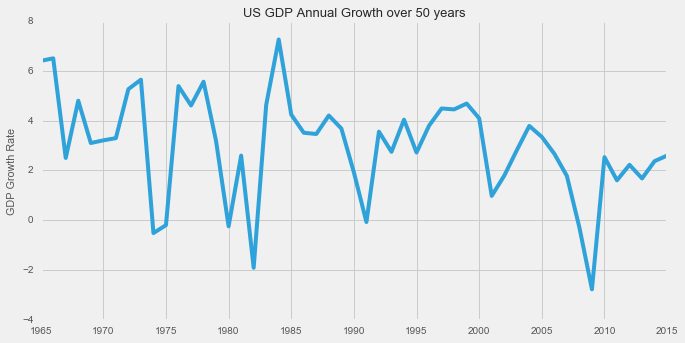

In [90]:
plt.figure(figsize=(10,5))
plt.plot(ts_US.index, ts_US)
plt.ylabel("GDP Growth Rate")
plt.title("US GDP Annual Growth over 50 years")
plt.show()

The US GDP Growth Rate 51 years data is displayed above. The time-series (TS) GDP data looks to be non-stationary as it is trended down and may have some seasonality also embedded on it.

In order to be sure of the existence of stationarity properties of the TS data, the following Dickey-Fuller test shall be conducted:

### Eliminating Trend and Seasonality

In [242]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

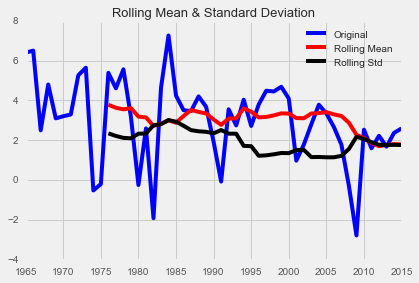

Results of Dickey-Fuller Test:
Test Statistic                 -5.193796
p-value                         0.000009
#Lags Used                      0.000000
Number of Observations Used    50.000000
Critical Value (5%)            -2.921360
Critical Value (1%)            -3.568486
Critical Value (10%)           -2.598662
dtype: float64


In [243]:
test_stationarity(ts_US)

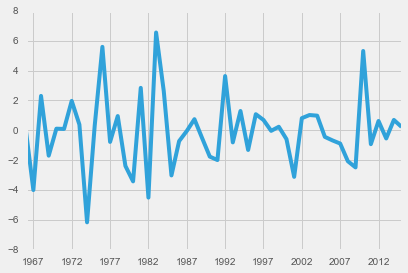

In [244]:
ts_US_diff = ts_US - ts_US.shift()
plt.plot(ts_US_diff)

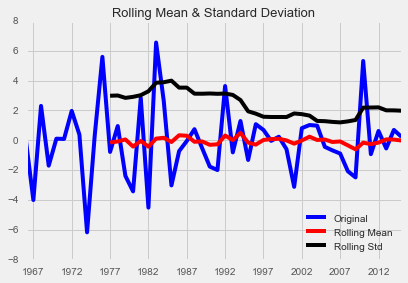

Results of Dickey-Fuller Test:
Test Statistic                 -4.243501
p-value                         0.000556
#Lags Used                      9.000000
Number of Observations Used    40.000000
Critical Value (5%)            -2.937069
Critical Value (1%)            -3.605565
Critical Value (10%)           -2.606986
dtype: float64


In [245]:
ts_US_diff.dropna(inplace=True)
test_stationarity(ts_US_diff)

Having detrend the TS data through differencing, the Dickey-Fuller stationarity test provides a better result. The rolling mean and standard deviation now have smaller variations with time.

The Test Statistic is now -4.24, which is lower than the Critical Value (5%) - meaning that the US GDP Growth Rate Time Series is stationary within a 95% confidence interval.


### ARIMA Model

The predictors for ARIMA, i.e the parameters (p,d,q) shall be derived via using Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).

### Autocorrelation and Partial Autocorrelation Plot

In [255]:
from statsmodels.tsa.stattools import acf, pacf

In [256]:
lag_acf = acf(ts_US_diff, nlags=20)
lag_pacf = pacf(ts_US_diff, nlags=20, method='ols')

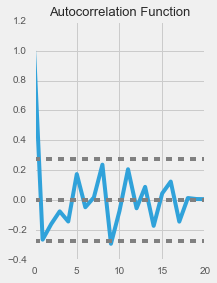

In [258]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_US_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_US_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

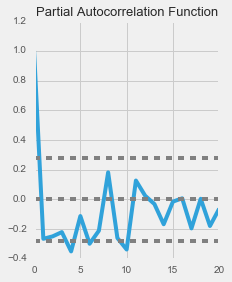

In [259]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_US_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_US_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In the ACF plot, the curve crossed the upper side of the confidence interval at p=1. In the same way in the PACF plot, the curve crossed the upper side of the confidence interval at q=1.

Using statsmodels:

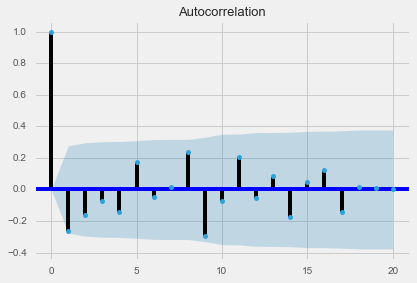

In [294]:
from statsmodels.graphics.tsaplots import plot_acf, acf
plt.figure(figsize=(15,10))
plot_acf(ts_US_diff.values, lags=20)
plt.show()

### Autoregression Model

In [261]:
from statsmodels.tsa.arima_model import ARIMA

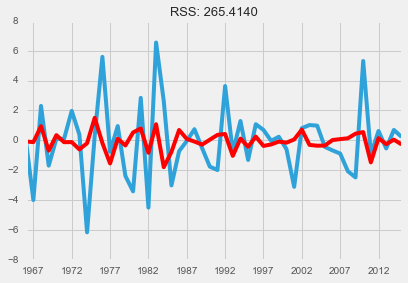

In [275]:
model = ARIMA(ts_US, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_US_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_US_diff)**2))

RSS for the value of the residuals is 265.41

### Moving Average Model

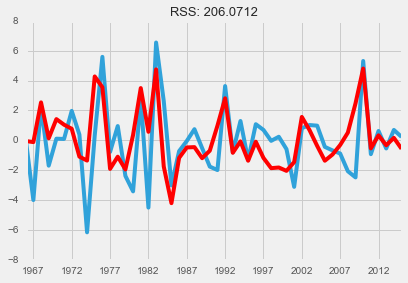

In [276]:
model = ARIMA(ts_US, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_US_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_US_diff)**2))

### ARIMA Model (Combined)

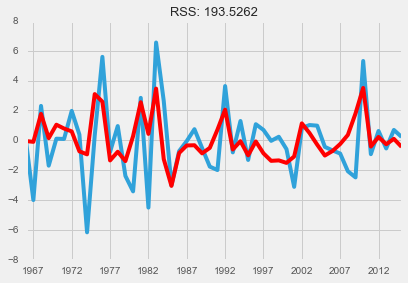

In [280]:
model = ARIMA(ts_US, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_US_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_US_diff)**2))

The combined model gives an improved RSS value compare to AR and MA done separately.

/Users/martinsimanjuntak/anaconda/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


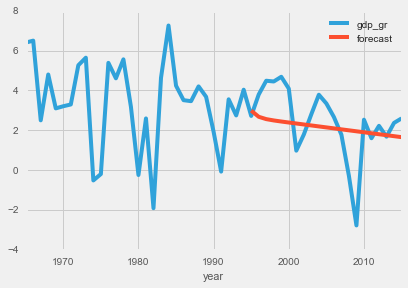

In [282]:
fig, ax = plt.subplots()
ax = ts_US.ix['1965-01-01':].plot(ax=ax)
fig = results_ARIMA.plot_predict('1995-01-01', '2015-01-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()

The prediction using the ARIMA model is shown in the above chart in the red forecast line.
It shows a level of conformance to the general trend of the series with less detailed fluctuations. It seems to be a fair result.

# IV. Summary and Next Steps

**Summary**
1. Even though the general concept of correlation between GDP vs. Energy Consumption is plausible, based on the analysis, this seems not to be represented by the data sets used. There seems to be weak  relationships between oil and gas production and consumption metrics with GDP per capita nor GDP growth rate. 
However, this may be just part of the 'story'. There are many important energy sources outside oil and gas and they are not part of this analysis. (e.g. coal, nuclear, hydropower, renewables). If  all these energy types are considered in the model, the correlation may be more evident.
2. For the oil and gas data set, a simple two-dimension linear model does not seem to perform well in explaining all variances in the data. The R2 metrics floating around 0.5 mark, whether or not the data is transposed in logarithmic scale. However, statistical models in a higher-dimension such as Decision Tree, with the associated ensemble methods (Boostrap Aggregating and GridSearchCV in this case) performs better with accuracy score around 81.7% (Null accuracy = 66.7%).
3. Time Series analysis of US GDP growth rate was conducted. Stationarity in the data achieved through differencing with Test Statistic within the 5% confidence level. ARIMA model is used to predict US GDP growth rate with Autoregression (AR) and Moving Average (MA) coefficients derived from the Autocorrelation and Partial Autocorrelation plots.


**Next steps:**
1. This analysis can be expanded to cover other type of energy sources to thoroughly examine the possible relationship between energy and GDP.
2. This analysis, particularly around the time-series predictive model using ARIMA, can be validated over time as new data is gathered in future. It may be more useful however, if the data point used is in monthly or weekly scale in order to have a timely validation of the model against un-seen data.